In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print(data.groupby(['Sex', 'Survived'])['Survived'].count())
print()
print(data[['Sex','Survived']].groupby(['Sex']).count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

        Survived
Sex             
female       314
male         577


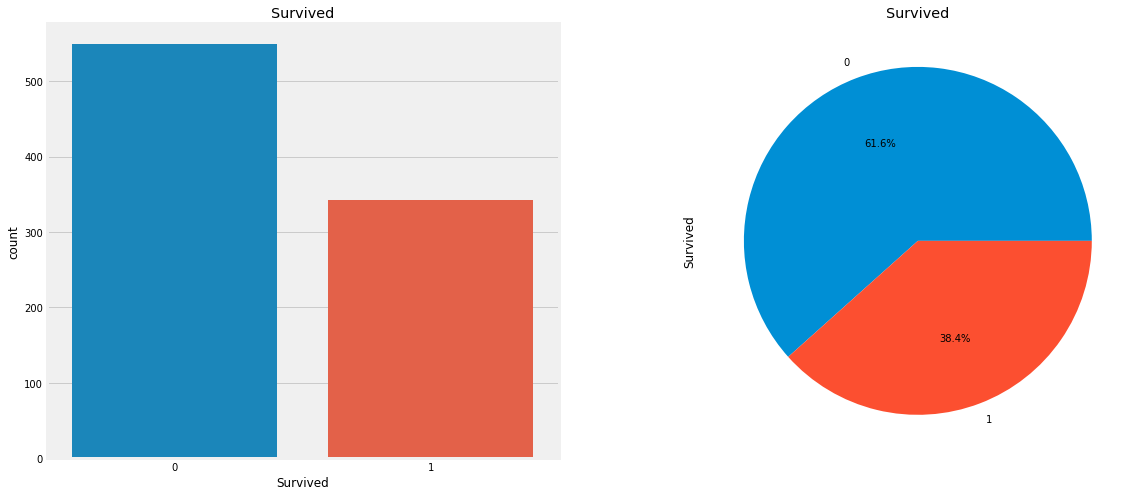

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.countplot(data['Survived'], ax=ax[0])
ax[0].set_title('Survived')

data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1]);
ax[1].set_title('Survived')

plt.show()



In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

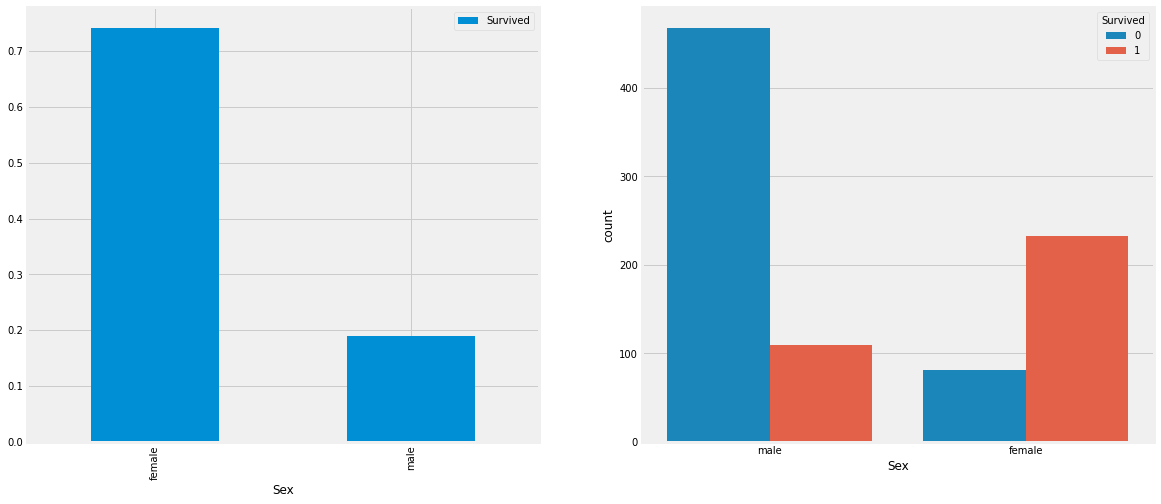

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1] );

In [8]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


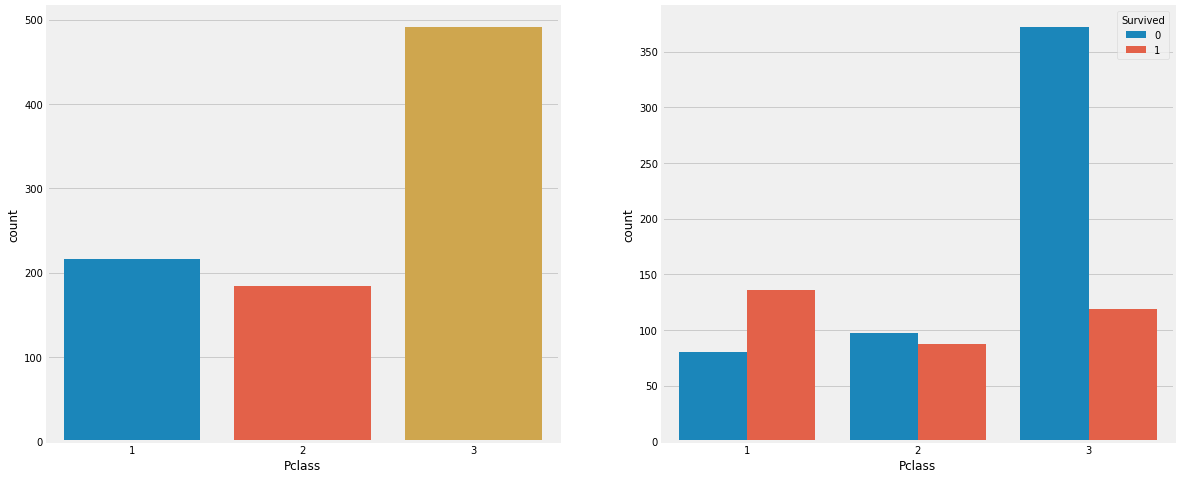

In [9]:
f, ax = plt.subplots(1,2,figsize= (18,8))
sns.countplot(data['Pclass'], ax=ax[0]);
sns.countplot('Pclass', data=data,  hue='Survived', ax=ax[1]);

In [10]:
pd.crosstab([data['Sex'],data['Survived']], data.Pclass, margins = True).style.background_gradient(cmap='summer_r')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

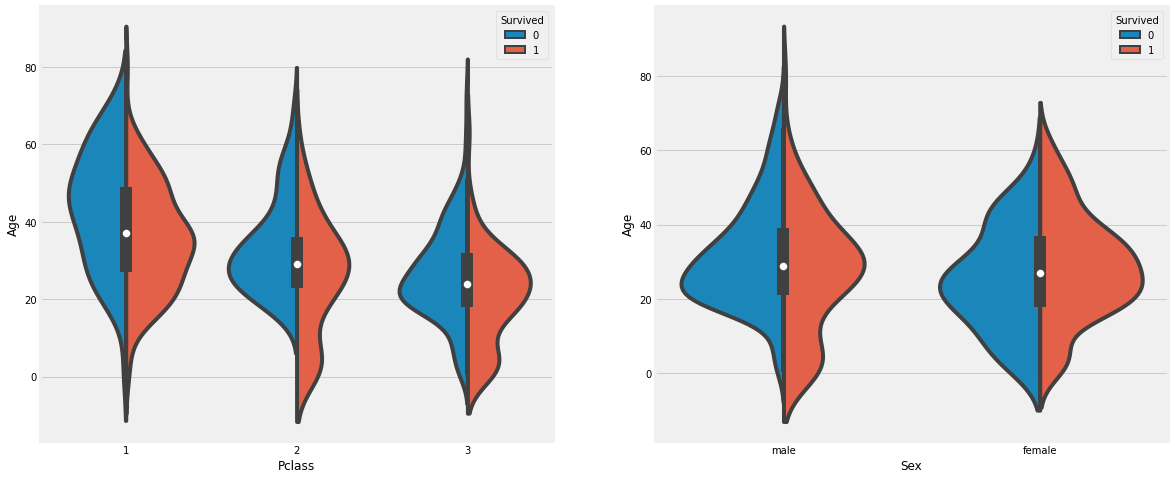

In [11]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot("Pclass", "Age",  hue="Survived", data=data, split=True , ax=ax[0])


sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])

In [12]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [13]:
data.isnull().sum()
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [14]:
data.groupby('Initial')['Age'].mean()



Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [15]:
data.loc[1:10, ['Age','Initial']]
data.iloc[1:10, 1:4]

,Survived,Pclass,Name
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,"Allen, Mr. William Henry"
5,0,3,"Moran, Mr. James"
6,0,1,"McCarthy, Mr. Timothy J"
7,0,3,"Palsson, Master. Gosta Leonard"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)"


In [31]:
data1 = data.copy()
data1.iloc[0:10] = np.NaN
data1.loc[:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data1.loc[data1.Age.isnull() & data1.Ticket.isnull() & data1.Survived.isnull(),['Age', 'Ticket','Survived']]= 'test value'
data1.loc[:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
1,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
2,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
3,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
4,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
5,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
6,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
7,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
8,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN
9,NaN,test value,NaN,NaN,NaN,test value,NaN,NaN,test value,NaN,NaN,NaN,NaN


In [33]:
data.loc[ data.Age.isnull() & data.Initial=='Mr' ,'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Mr
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Mr
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


<AxesSubplot:xlabel='Age', ylabel='Count'>

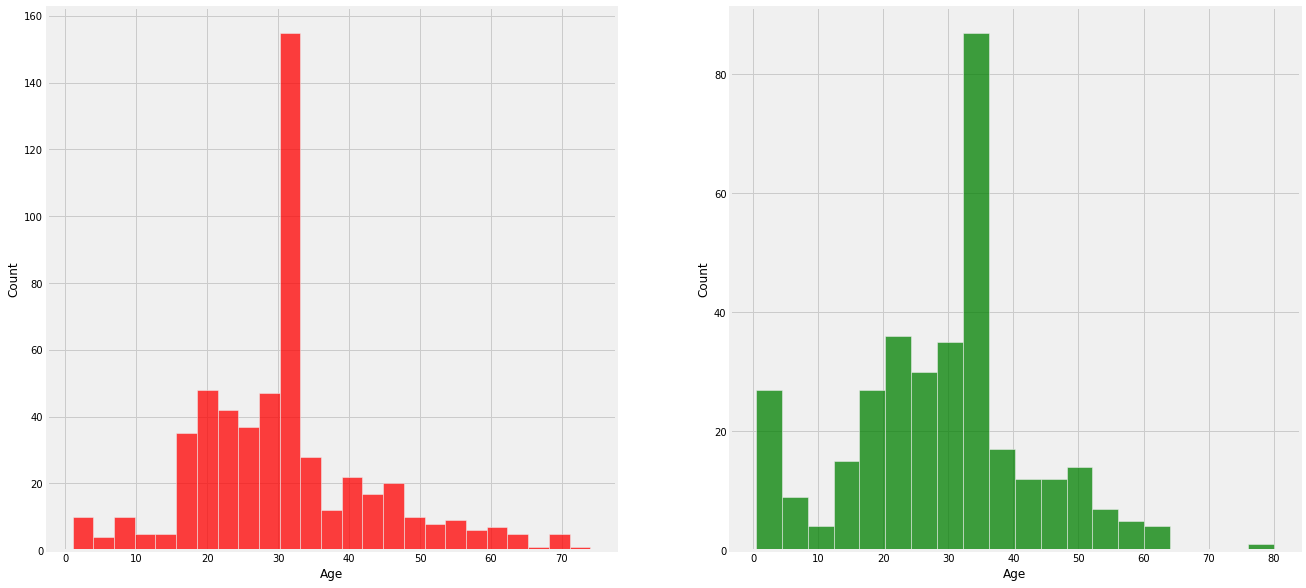

In [40]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.histplot(x=data[data['Survived'] == 0 ]['Age'], ax=ax[0], color='red' )

sns.histplot(x=data[data['Survived']== 1]['Age'], ax=ax[1], color='green'  )

In [42]:
pd.crosstab([data.Embarked,data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

In [58]:

data.isnull().sum()
data.Embarked.fillna('S', inplace=True)
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

In [63]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64